In [247]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
import math
from copy import deepcopy

import geopandas as gpd
import numpy as np
from itertools import chain
from itertools import combinations

sys.path.insert(0, "../")
from weavingspace.tile_unit import TileUnit
from weavingspace.weave_unit import WeaveUnit
from weavingspace.tile_map import Tiling
from weavingspace import tiling_utils
import shapely.geometry as geom
from shapely import line_interpolate_point
from shapely import equals
from shapely import equals_exact
import geopandas as gpd

<Axes: >

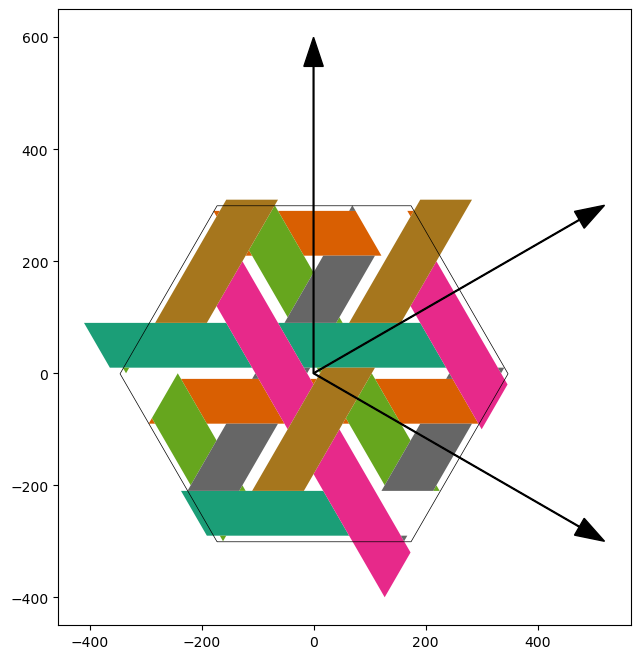

In [249]:
# t = TileUnit(tiling_type = "square-colouring", code = "4.8.8", n = 7, offset = 0).inset_prototile(10)
t = WeaveUnit(weave_type = "cube", spacing = 100, aspect = 0.8, strands = "a-b|c-d|e-g")
# t = WeaveUnit(weave_type = "twill", spacing = 100, aspect = 0.8, strands = "ab|de")
t.plot(r = 0, show_vectors = True, show_ids = False, show_prototile = True, show_reg_prototile = False)

In [250]:
from collections import defaultdict
tiles_ids = [x for x in zip(range(t.tiles.shape[0]), t.tiles.tile_id, list(t.tiles.geometry))]

v_ij = defaultdict(list)
for i, id_i, tile_i in tiles_ids:
  for j, id_j, tile_j in tiles_ids:
    if i != j and id_i == id_j and np.isclose(tile_i.area, tile_j.area):
      v_ij[(tile_j.centroid.x - tile_i.centroid.x, 
            tile_j.centroid.y - tile_i.centroid.y)].append((i, j))
max_len = max([len(x) for x in v_ij.values()])
v_ij = dict(sorted(v_ij.items(), key = lambda x: len(x[1]), reverse = True))
v_ij = [v for v in v_ij.keys()][:6]
combos = combinations(v_ij, 3)
result = [c for c in combos if (sum([x for x, y in c]), sum(y for x, y in c)) == (0, 0)]
result

[((-346.410162, 0.0), (173.205081, -300.0), (173.205081, 300.0)),
 ((346.410162, 0.0), (-173.205081, 300.0), (-173.205081, -300.0))]

<Axes: >

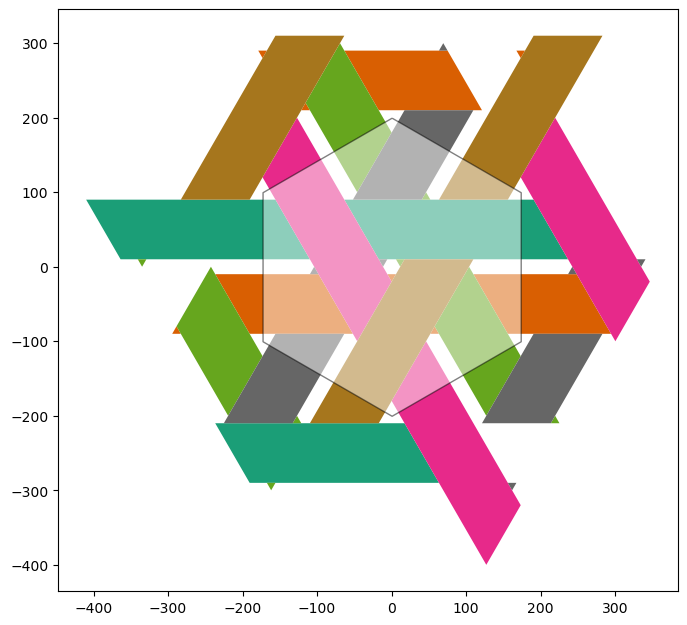

In [251]:
poly = tiling_utils.get_prototile_from_vectors(result[0])
ax = t.plot(show_ids = False, show_prototile = False, show_reg_prototile = False)
gpd.GeoSeries([poly]).plot(ax = ax, color = 'w', alpha = 0.5, ec = 'k')

In [276]:
t2 = deepcopy(t)
t2.prototile.geometry = [poly]
t2.setup_vectors()
new_tiles = [(id, t.intersection(poly)) for id, t in zip(t2.tiles.tile_id, t2.tiles.geometry) if t.intersects(poly)]
t2.tiles = gpd.GeoDataFrame({'geometry': gpd.GeoSeries([x[1] for x in new_tiles]),
                             'tile_id': [x[0] for x in new_tiles]})
t2.regularise_tiles()

<Axes: >

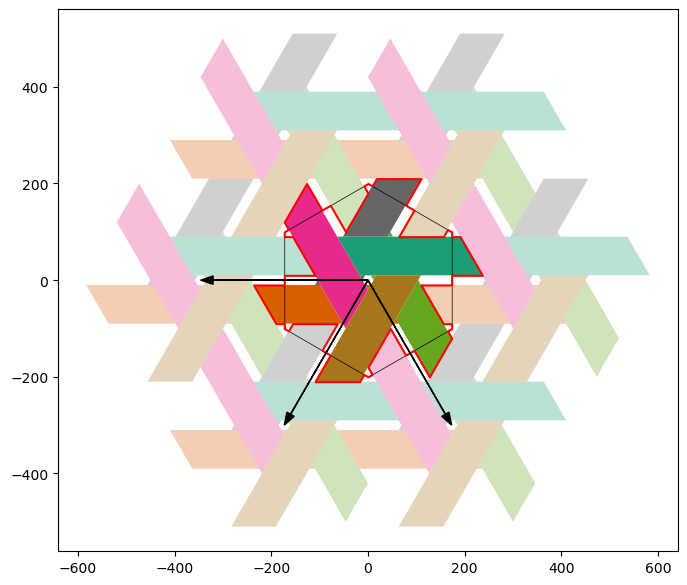

In [279]:
t2.plot(r = 1, show_vectors = True, show_ids = False)


# Scratch pad
A barebones notebook for testing basic operations of the package. The above code loads necessary libraries and allows for making a map.

In [8]:
# ak = gpd.read_file("data/imd-auckland-2018.gpkg")

In [9]:
# tile = TileUnit(tiling_type="square-colouring", 
#                 code="3.3.4.3.4", 
#                 spacing=500, 
#                 n=8, 
#                 crs=ak.crs) \
#                   .inset_prototile(10).inset_tiles(0)
# tile.plot(r=1)


In [10]:
# n = tile.tiles.shape[0]
# vars = dict(zip(list("abcdefghijkl")[:n], [x for x in ak.columns if "Rank" in x][:n]))
# cmaps = dict(zip(vars.values(), ["Reds", "Oranges", "Greens", "Blues", 
#                                  "Purples", "Greys", "YlOrBr", "PuRd", 
#                                  "YlOrRd", "BuGn", "BuPu", "YlGnBu" ][:n]))
# tiling = Tiling(tile, ak)
# map = tiling.get_tiled_map()
# fig = map.render(variables=vars, colourmaps=cmaps, use_ellipse=True)